In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [18]:
data=pd.read_csv('abalone.csv')

In [19]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [20]:
data.shape

(4177, 9)

In [21]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
data.loc[data['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


### Dealing with zero values present in Height column

In [22]:
data['Height']=data['Height'].replace(0.0,data['Height'].mean())

In [23]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [26]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

### Checking Null values in Data frame

In [28]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### Visualization of the categorical column i.e Sex

In [29]:
import seaborn as sns

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


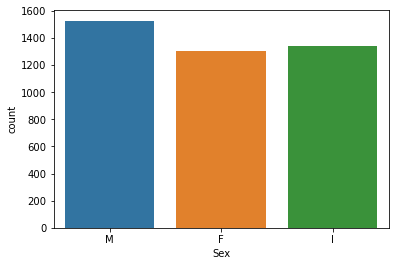

In [30]:
sns.countplot(x='Sex',data=data)
print(data['Sex'].value_counts())

### Encoding of the Categorical column

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
enc=LabelEncoder()
data['Sex']=enc.fit_transform(data['Sex'])

2    1528
1    1342
0    1307
Name: Sex, dtype: int64


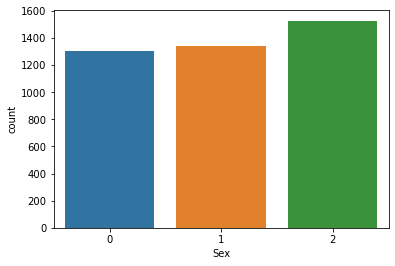

In [34]:
sns.countplot(x='Sex',data=data)
print(data['Sex'].value_counts())

In [35]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Lets see how data is distributed for every column

In [36]:
import matplotlib.pyplot as plt

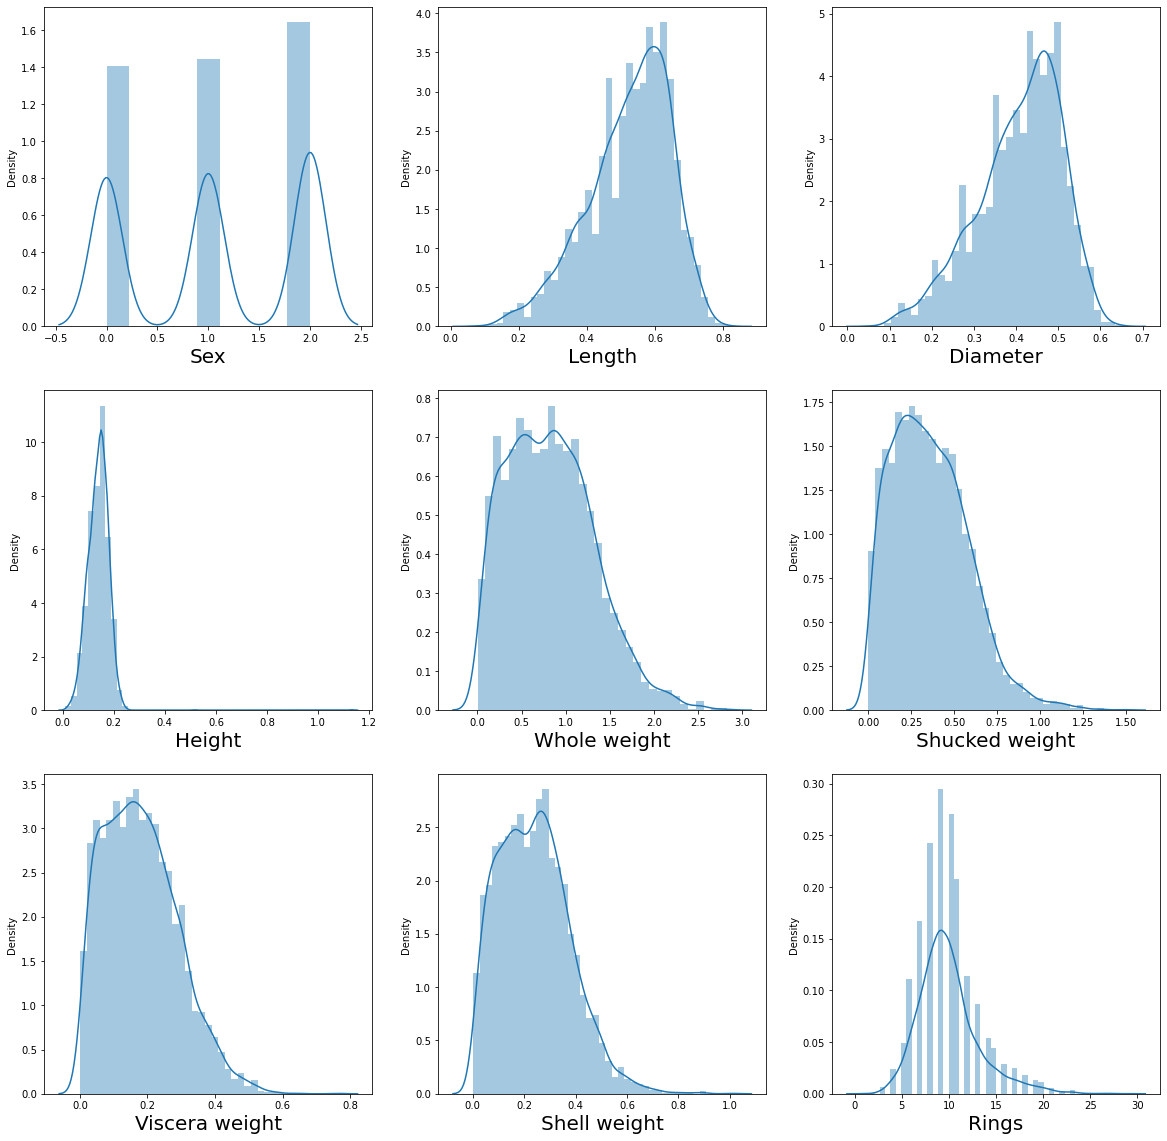

In [37]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Correlation of the features with the target column

In [42]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042293,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827748,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833931,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042293,0.827748,0.833931,1.000000,0.819624,0.775406,0.798653,0.819455,0.557502
Whole weight,-0.021391,0.925261,0.925452,0.819624,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.775406,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798653,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.819455,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557502,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

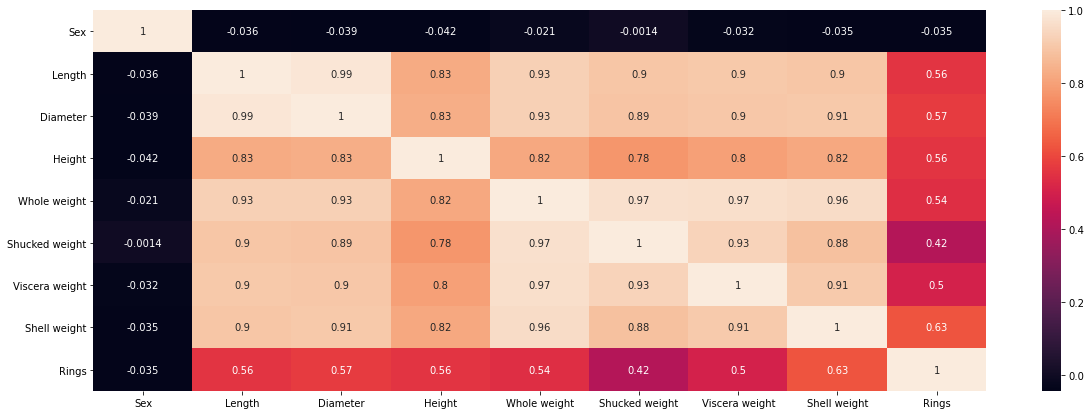

In [43]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True)

### Vizualize the outliers using boxplot

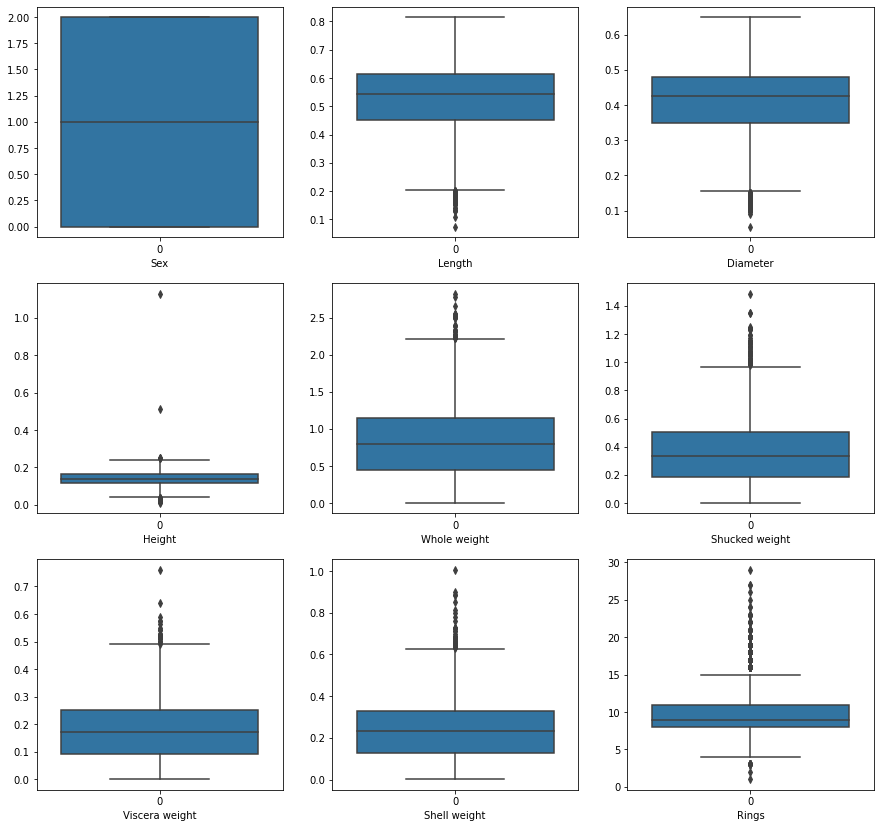

In [75]:
plt.figure(figsize=(15,50))
graph=1
for column in data:
    if graph<=10:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(data=data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

### Removing Outliers using z-score technique

In [49]:
from scipy.stats import zscore

In [76]:
z=np.abs(zscore(data))
z.shape

(4177, 9)

In [77]:
print(np.where(z>2.5))   # setting threshold=2.5

(array([   6,    9,   32,   33,   43,   43,   44,   44,   72,   81,   83,
        128,  129,  129,  148,  148,  149,  149,  157,  163,  163,  163,
        164,  165,  165,  165,  165,  166,  166,  166,  167,  167,  168,
        169,  170,  170,  181,  232,  236,  236,  236,  236,  237,  237,
        237,  238,  238,  238,  239,  239,  239,  256,  270,  275,  277,
        277,  278,  293,  294,  305,  305,  306,  306,  306,  310,  312,
        313,  314,  318,  321,  321,  334,  351,  355,  355,  355,  357,
        358,  358,  358,  358,  360,  362,  365,  372,  372,  375,  375,
        416,  417,  426,  427,  428,  429,  430,  431,  432,  433,  442,
        449,  450,  463,  465,  465,  468,  469,  478,  480,  483,  497,
        501,  520,  520,  523,  523,  525,  525,  526,  526,  530,  547,
        547,  572,  582,  592,  593,  611,  611,  613,  621,  628,  642,
        658,  660,  664,  672,  673,  674,  675,  678,  694,  694,  694,
        696,  696,  718,  718,  718,  719,  719,  

In [154]:
data_up=data[(z<2.5).all(axis=1)]

In [155]:
data_up.shape

(3851, 9)

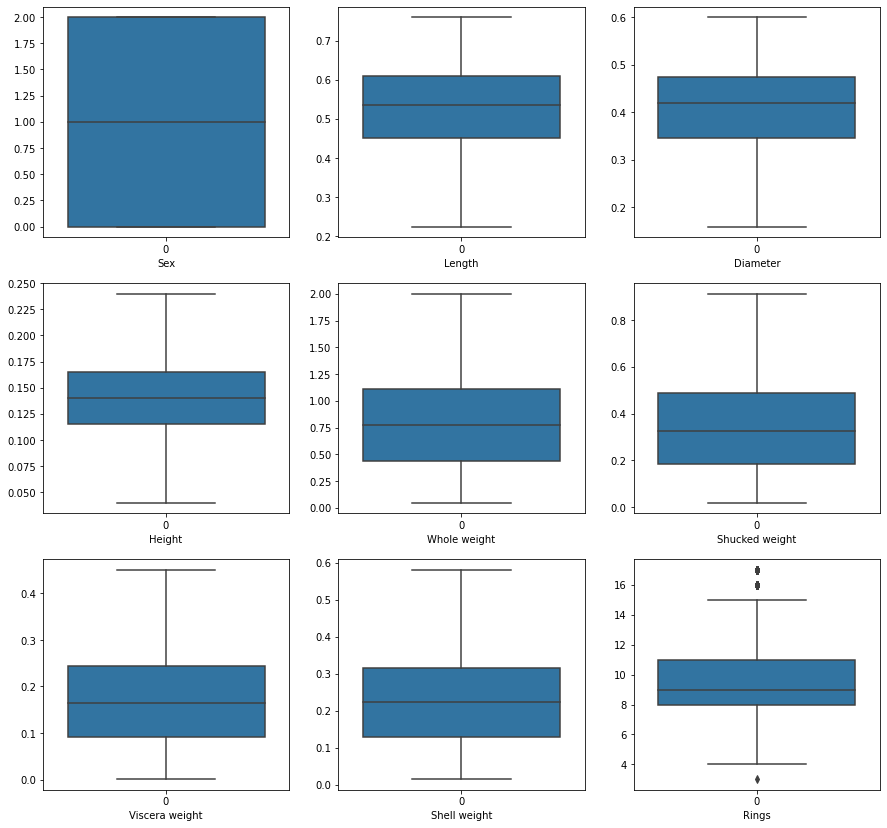

In [156]:
plt.figure(figsize=(15,50))
graph=1
for column in data_up:
    if graph<=10:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(data=data_up[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

### Checking skewness

In [157]:
data_up.skew()

Sex              -0.095249
Length           -0.522433
Diameter         -0.505408
Height           -0.165362
Whole weight      0.274410
Shucked weight    0.391416
Viscera weight    0.375964
Shell weight      0.282787
Rings             0.558561
dtype: float64

### Divide Dataset into features and label

In [158]:
x=data_up.drop(columns=['Rings'])
y=data_up['Rings']

In [159]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4171,2,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [160]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4171     8
4172    11
4173    10
4174     9
4175    10
Name: Rings, Length: 3851, dtype: int64

### Scaling the data using Standard Scaler

In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.16114353, -0.60717893, -0.44619573, ..., -0.61161069,
        -0.73439827, -0.6369566 ],
       [ 1.16114353, -1.56753815, -1.54805842, ..., -1.24556775,
        -1.2681232 , -1.2973689 ],
       [-1.28768655,  0.07879195,  0.15982875, ..., -0.44931768,
        -0.32266761, -0.14164738],
       ...,
       [ 1.16114353,  0.62756864,  0.38020128, ...,  0.47625962,
         0.4194642 ,  0.27523789],
       [ 1.16114353,  0.71903143,  0.76585322, ...,  0.91495791,
         1.161596  ,  0.66735769],
       [-1.28768655,  0.94768838,  0.87603949, ...,  0.94285202,
         0.89219199,  0.56829584]])

### finding the best random state

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
LR=LinearRegression()

In [164]:
maxAccu=0
maxRS=0
for i in range(0,10000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_test)
    accu=r2_score(y_test,y_pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRs=i
print('Max accuracy is ',maxAccu,'on random state',maxRs)
    

Max accuracy is  0.5695598997470013 on random state 6881


In [165]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=6881)

In [166]:
LR.fit(x_train,y_train)

LinearRegression()

In [167]:
y_pred=LR.predict(x_test)

In [168]:
print(r2_score(y_test,y_pred))

0.5695598997470013


### Cross Validation 

In [169]:
from sklearn.model_selection import cross_val_score

In [170]:
cv_score=cross_val_score(LR,x_scaled,y,cv=5)
print(cv_score.mean())

0.39931284064643335


### Regularization

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [172]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [173]:
ls=Lasso(alpha=.0001,random_state=0)
ls.fit(x_train,y_train)


Lasso(alpha=0.0001, random_state=0)

In [174]:
ls.score(x_train,y_train)

0.4688843627080884

In [175]:
ls_pred=ls.predict(x_test)

In [176]:
lss=r2_score(y_test,ls_pred)
lss

0.5695289934041219

### Ensemble Technique

In [177]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [179]:
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [180]:
rf=RandomForestRegressor(criterion='mse',max_features='sqrt')
rf.fit(x_train,y_train)


RandomForestRegressor(max_features='sqrt')

In [181]:
rf.score(x_train,y_train)

0.9316517791924025

In [182]:
rf_pred=rf.predict(x_test)

In [183]:
rfs=r2_score(y_test,rf_pred)
rfs

0.5761260331815008

In [185]:
rfscore=cross_val_score(rf,x_scaled,y,cv=5)
print(rfscore.mean())

0.452655125131856


In [186]:
import pickle

In [188]:
filename='rings.pkl'
pickle.dump(rf,open(filename,'wb'))